# 4章 4.2 EGM を用いた TI の準コード

In [182]:
# パッケージのインポート

import numpy as np
import numpy.typing as npt
from numpy.polynomial.chebyshev import Chebyshev
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

### 1. パラメータをカリブレーション

In [183]:
# パラメータをカリブレーション
beta = 0.96
gamma = 1.0
alpha = 0.5 # 1を割った時に正数となる値にする
delta = 1.0

### 2. 収束の基準を定義

In [184]:
# 収束の基準を定義
epsilon = 1e-5

### 3. 制御変数のグリッドを生成

- $\{ k^\prime \}_{i = 1}^N, \;\; N = 21$
- $k_1^\prime = 0, k_{21}^\prime = 0.5$

In [185]:
# 制御変数のグリッドを生成
nk = 20
kprime_grid = np.linspace(0.025, 0.5, nk)
print(kprime_grid)

[0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3
 0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5  ]


### 4. 確率変数$z$のグリッド$\{ z_j \}_{j = 1}^N$を生成

In [186]:
# パラメータの値は教科書に則ったもの
nz = 12 # 0を避けるために12に設定
rho = 0.95
sigma = 0.01
m = 2.575
z_max = m * sigma / math.sqrt(1 - rho**2)
z_grid = np.linspace(-z_max, z_max, nz)
print(z_grid)

[-0.082 -0.067 -0.052 -0.037 -0.022 -0.007  0.007  0.022  0.037  0.052
  0.067  0.082]


### 5. $N_z \times N_z$の遷移確率行列を定義

In [187]:
d = 2 * z_max / (nz - 1)
P = np.zeros((nz, nz))
for i in range(nz):
    for j in range(nz):
        if j == 0:
            P[i, j] = norm.cdf(z_grid[j] + d / 2 - rho * z_grid[i], loc = 0, scale = sigma)
        elif j == nz:
            P[i, j] = 1 - norm.cdf(z_grid[j] - d / 2 - rho * z_grid[i], loc = 0, scale = sigma)
        else:
            P[i, j] = norm.cdf(z_grid[j] + d /2 - rho * z_grid[i], sigma) - norm.cdf(z_grid[j] - d / 2 - rho * z_grid[i], loc = 0, scale = sigma)
# np.printoptions(precision = 5)
print(P)

[[ 6.321e-01 -1.287e-01 -4.576e-01 -4.843e-01 -4.787e-01 -4.728e-01
  -4.668e-01 -4.608e-01 -4.549e-01 -4.489e-01 -4.430e-01 -4.371e-01]
 [ 1.385e-01  3.591e-01 -1.563e-01 -4.624e-01 -4.841e-01 -4.784e-01
  -4.725e-01 -4.665e-01 -4.605e-01 -4.546e-01 -4.487e-01 -4.427e-01]
 [ 6.012e-03  4.860e-01  3.422e-01 -1.830e-01 -4.666e-01 -4.839e-01
  -4.781e-01 -4.722e-01 -4.662e-01 -4.602e-01 -4.543e-01 -4.484e-01]
 [ 4.145e-05  4.863e-01  4.849e-01  3.239e-01 -2.088e-01 -4.702e-01
  -4.836e-01 -4.778e-01 -4.719e-01 -4.659e-01 -4.599e-01 -4.540e-01]
 [ 4.154e-08  4.806e-01  4.865e-01  4.835e-01  3.042e-01 -2.335e-01
  -4.732e-01 -4.834e-01 -4.775e-01 -4.716e-01 -4.656e-01 -4.596e-01]
 [ 5.816e-12  4.749e-01  4.809e-01  4.868e-01  4.818e-01  2.833e-01
  -2.570e-01 -4.757e-01 -4.831e-01 -4.772e-01 -4.713e-01 -4.653e-01]
 [ 1.114e-16  4.693e-01  4.752e-01  4.812e-01  4.871e-01  4.797e-01
   2.610e-01 -2.793e-01 -4.778e-01 -4.828e-01 -4.769e-01 -4.710e-01]
 [ 2.886e-22  4.636e-01  4.696e-01  4.755

### 6. 初期値として政策関数を当て推量 $c_{i, t} = h^{(0)}(k_i^\prime, z_t)$

In [188]:
# 6. 初期値として政策関数を当て推量 $c_{i, t} = h^{(0)}(k_i^\prime, z_t)$を設定
# kprime と z の値に従って, 増加するような c を生成
h_old_grid = np.dot(kprime_grid.reshape(nk, 1),np.exp(z_grid).reshape(1, nz)) * 0.8
np.set_printoptions(precision=3)
print(h_old_grid)

[[0.018 0.019 0.019 0.019 0.02  0.02  0.02  0.02  0.021 0.021 0.021 0.022]
 [0.037 0.037 0.038 0.039 0.039 0.04  0.04  0.041 0.042 0.042 0.043 0.043]
 [0.055 0.056 0.057 0.058 0.059 0.06  0.06  0.061 0.062 0.063 0.064 0.065]
 [0.074 0.075 0.076 0.077 0.078 0.079 0.081 0.082 0.083 0.084 0.086 0.087]
 [0.092 0.093 0.095 0.096 0.098 0.099 0.101 0.102 0.104 0.105 0.107 0.109]
 [0.111 0.112 0.114 0.116 0.117 0.119 0.121 0.123 0.125 0.126 0.128 0.13 ]
 [0.129 0.131 0.133 0.135 0.137 0.139 0.141 0.143 0.145 0.148 0.15  0.152]
 [0.147 0.15  0.152 0.154 0.156 0.159 0.161 0.164 0.166 0.169 0.171 0.174]
 [0.166 0.168 0.171 0.173 0.176 0.179 0.181 0.184 0.187 0.19  0.193 0.195]
 [0.184 0.187 0.19  0.193 0.196 0.199 0.202 0.205 0.208 0.211 0.214 0.217]
 [0.203 0.206 0.209 0.212 0.215 0.218 0.222 0.225 0.228 0.232 0.235 0.239]
 [0.221 0.224 0.228 0.231 0.235 0.238 0.242 0.245 0.249 0.253 0.257 0.261]
 [0.239 0.243 0.247 0.25  0.254 0.258 0.262 0.266 0.27  0.274 0.278 0.282]
 [0.258 0.262 0.266 0.27 

### 7. 次のステップを収束するまで繰り返す(繰り返し記号：n)
   1. 古い政策関数 $h^{(n-1)}(k_i^\prime)$ を所与として，$\{k^\prime_i\}_{i=1}^{N_k} \times \{z_s\}_{s=1}^{N_z}$ の各グリッドについて
   	
      - $c_{i, s} = u^{\prime -1} ( \beta \sum_{t=1}^{N_z} \{ P_{s,t} u^\prime(h^{(n-1)}(k^\prime_i, z_t)) \times \tilde{f}^\prime (k^\prime_i, z_t)\} )$
      - $c_{i,s} + k^\prime_i = \tilde{f}(k_i, z_s) \Rightarrow k_i = \tilde{f}^{-1} (c_{i,s} + k^\prime_i)$

In [189]:
# ステップ7の準備（ndarrayが前提）
def u_prime(c: npt.NDArray) -> npt.NDArray:
    return c**(-gamma)
def u_prime_inv(mu: npt.NDArray) -> npt.NDArray:
    return mu**(-1/gamma)
def f_tilde(k: npt.NDArray, z: npt.NDArray) -> npt.NDArray:
    return np.exp(z) * k**alpha
def f_tilde_prime(k: npt.NDArray, z: npt.NDArray) -> npt.NDArray:
    return alpha * np.exp(z) * k**(alpha - 1)
def f_tilde_inv(y: npt.NDArray, z: npt.NDArray) -> npt.NDArray:
    result = (y / math.exp(z))**(1 / alpha) 
    return result

# 二変数チェビシェフ補間用の関数
def chebyshev_2d_interpolation(x, y, f_vals, degree_x, degree_y):
    # チェビシェフ多項式を2次元でフィットする
    cheb_x = Chebyshev.fit(x, f_vals, degree_x, domain=[min(x), max(x)])
    cheb_y = Chebyshev.fit(y, f_vals, degree_y, domain=[min(y), max(y)])

    # 補間関数を定義
    def interpolated_func(x_new, y_new):
        return cheb_x(x_new) + cheb_y(y_new)
    
    return interpolated_func

In [210]:
diff = epsilon + 1
loop = 0
while diff > epsilon:
    loop += 1
    Gamma = np.zeros((nk, nz)) # オイラー方程式の右辺
    c0 = np.zeros((nk, nz))
    k = np.zeros((nk, nz))
    for i in range(nk):
        for s in range(nz):
            for t in range(nz):
                Gamma[i, s] += beta * P[s, t] * u_prime(h_old_grid[i, t]) * (f_tilde_prime(kprime_grid[i], z_grid[t]))
            c0[i, s] = u_prime_inv(Gamma[i, s])
            k[i, s] = f_tilde_inv(c0[i ,s] + kprime_grid[i], z_grid[s])
            if math.isnan(k[i, s]):
                print("Invalid value, c0, kprime, z", c0[i, s], kprime_grid[i], z_grid[s])
                
    
    # 補間の準備
    c0_list = c0.flatten()
    k_list = k.flatten()
    z_list = np.array(list(z_grid) * nk)
    # print(k_list)

    # 新しい政策関数を生成
    h_new_func = chebyshev_2d_interpolation(k_list, z_list, c0_list, 5, 5)
    np_h_new_func = np.frompyfunc(h_new_func, 2, 1)

    # # 収束の確認
    k_matrix = np.zeros((nk, nz))
    for i in range(nk):
        k_matrix[i, :] = kprime_grid[i]
    z_matrix = z_list.reshape(nk, nz)
    h_new_grid = np_h_new_func(k_matrix, z_matrix)
    diff = np.max(np.abs(h_new_grid - h_old_grid))
    
    h_old_grid = h_new_grid

print(h_old_grid)

/Users/hiroetomokana/Library/Caches/pypoetry/virtualenvs/quant-macro-workshop-bUjjWVNQ-py3.12/lib/python3.12/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)
/Users/hiroetomokana/Library/Caches/pypoetry/virtualenvs/quant-macro-workshop-bUjjWVNQ-py3.12/lib/python3.12/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)
/Users/hiroetomokana/Library/Caches/pypoetry/virtualenvs/quant-macro-workshop-bUjjWVNQ-py3.12/lib/python3.12/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)
/Users/hiroetomokana/Library/Caches/pypoetry/virtualenvs/quant-macro-workshop-bUjjWVNQ-py3.12/lib/python3.12/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return

KeyboardInterrupt: 

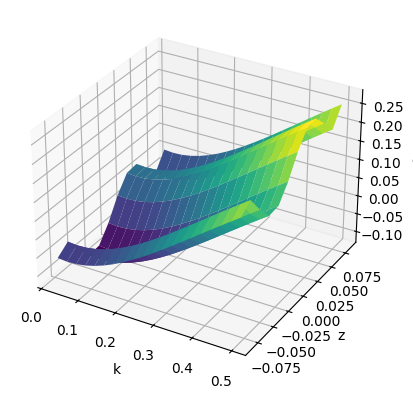

72435
0.12991520269088785


In [211]:
# np_h_new_func を使って三次元プロット
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(k_matrix, z_matrix, np_h_new_func(k_matrix, z_matrix), cmap='viridis')
ax.set_xlabel('k')
ax.set_ylabel('z')
ax.set_zlabel('c')
plt.show()
print(loop)
print(diff)

In [181]:
%reset -f